* Commençons par importer les librairies nécessaires pour ce projet.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Esseyons de visualiser notre jeu de données pour avoir une idée de ce que nous pouvons faire avec ce jeu de données

In [35]:
dataset_full = pd.read_csv("Speed Dating Data.csv",engine='python') # l'argument permet engine = 'python', permet notre dataset 
dataset_full.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

* Nous pouvons constater que notre jeu de données a plusieurs valeurs manquantes. Pour être plus précis, nous allons compter le nombres de valeurs manquantes pour chaque variable et afficher les dix variables qui contiennent plus de valeurs manquantes 

In [17]:
#counting null values
nan = pd.DataFrame(dataset_full.isnull().sum(), columns= ['nan_count']) # compter les nan (null) dans chaque variable
nan.sort_values("nan_count", ascending = False).head(10)

nan_count
num_in_3       7710
numdat_3       6882
expnum         6578
sinc7_2        6423
amb7_2         6423
shar7_2        6404
attr7_2        6394
intel7_2       6394
fun7_2         6394
amb5_3         6362

* Regardons la corrélation entre variables, pour pouvoir fair le choix des variables à utiliser

In [18]:
features = dataset_full.iloc[:, :150]
corr = features.corr()
corr.head()

iid        id    gender       idg    condtn      wave     round  \
iid     1.000000  0.117109  0.051937  0.120362  0.220413  0.996713  0.231881   
id      0.117109  1.000000 -0.011623  0.998029  0.318768  0.091571  0.374462   
gender  0.051937 -0.011623  1.000000  0.033645 -0.002627 -0.001264  0.020630   
idg     0.120362  0.998029  0.033645  1.000000  0.324838  0.092645  0.387715   
condtn  0.220413  0.318768 -0.002627  0.324838  1.000000  0.219627  0.816316   

        position  positin1     order  ...   attr2_2   sinc2_2  intel2_2  \
iid     0.081287  0.070443  0.090696  ...  0.369776 -0.117107 -0.268588   
id      0.168382  0.174008  0.149216  ...  0.051603 -0.049669 -0.030305   
gender -0.001091  0.005853  0.006685  ... -0.248577  0.285732  0.262240   
idg     0.171495  0.177639  0.154691  ...  0.042318 -0.040996 -0.020319   
condtn  0.329120  0.308641  0.324108  ...  0.033521  0.000122 -0.020322   

          fun2_2    amb2_2   shar2_2   attr3_2   sinc3_2  intel3_2    fun3_2  
iid     0.005048 -0.298762 -0.247383  0.009244  0.014614 -0.010856  0.067983  
id     -0.007876 -0.039145  0.007950 -0.012396 -0.002744 -0.010852  0.004899  
gender -0.125723  0.365245 -0.169655 -0.077667 -0.139473  0.105553 -0.109822  
idg    -0.011516 -0.023450  0.000059 -0.013649 -0.009249 -0.004779  0.004198  
condtn -0.015682 -0.050015  0.013515  0.006270  0.016635  0.037351  0.000066  

[5 rows x 142 columns]

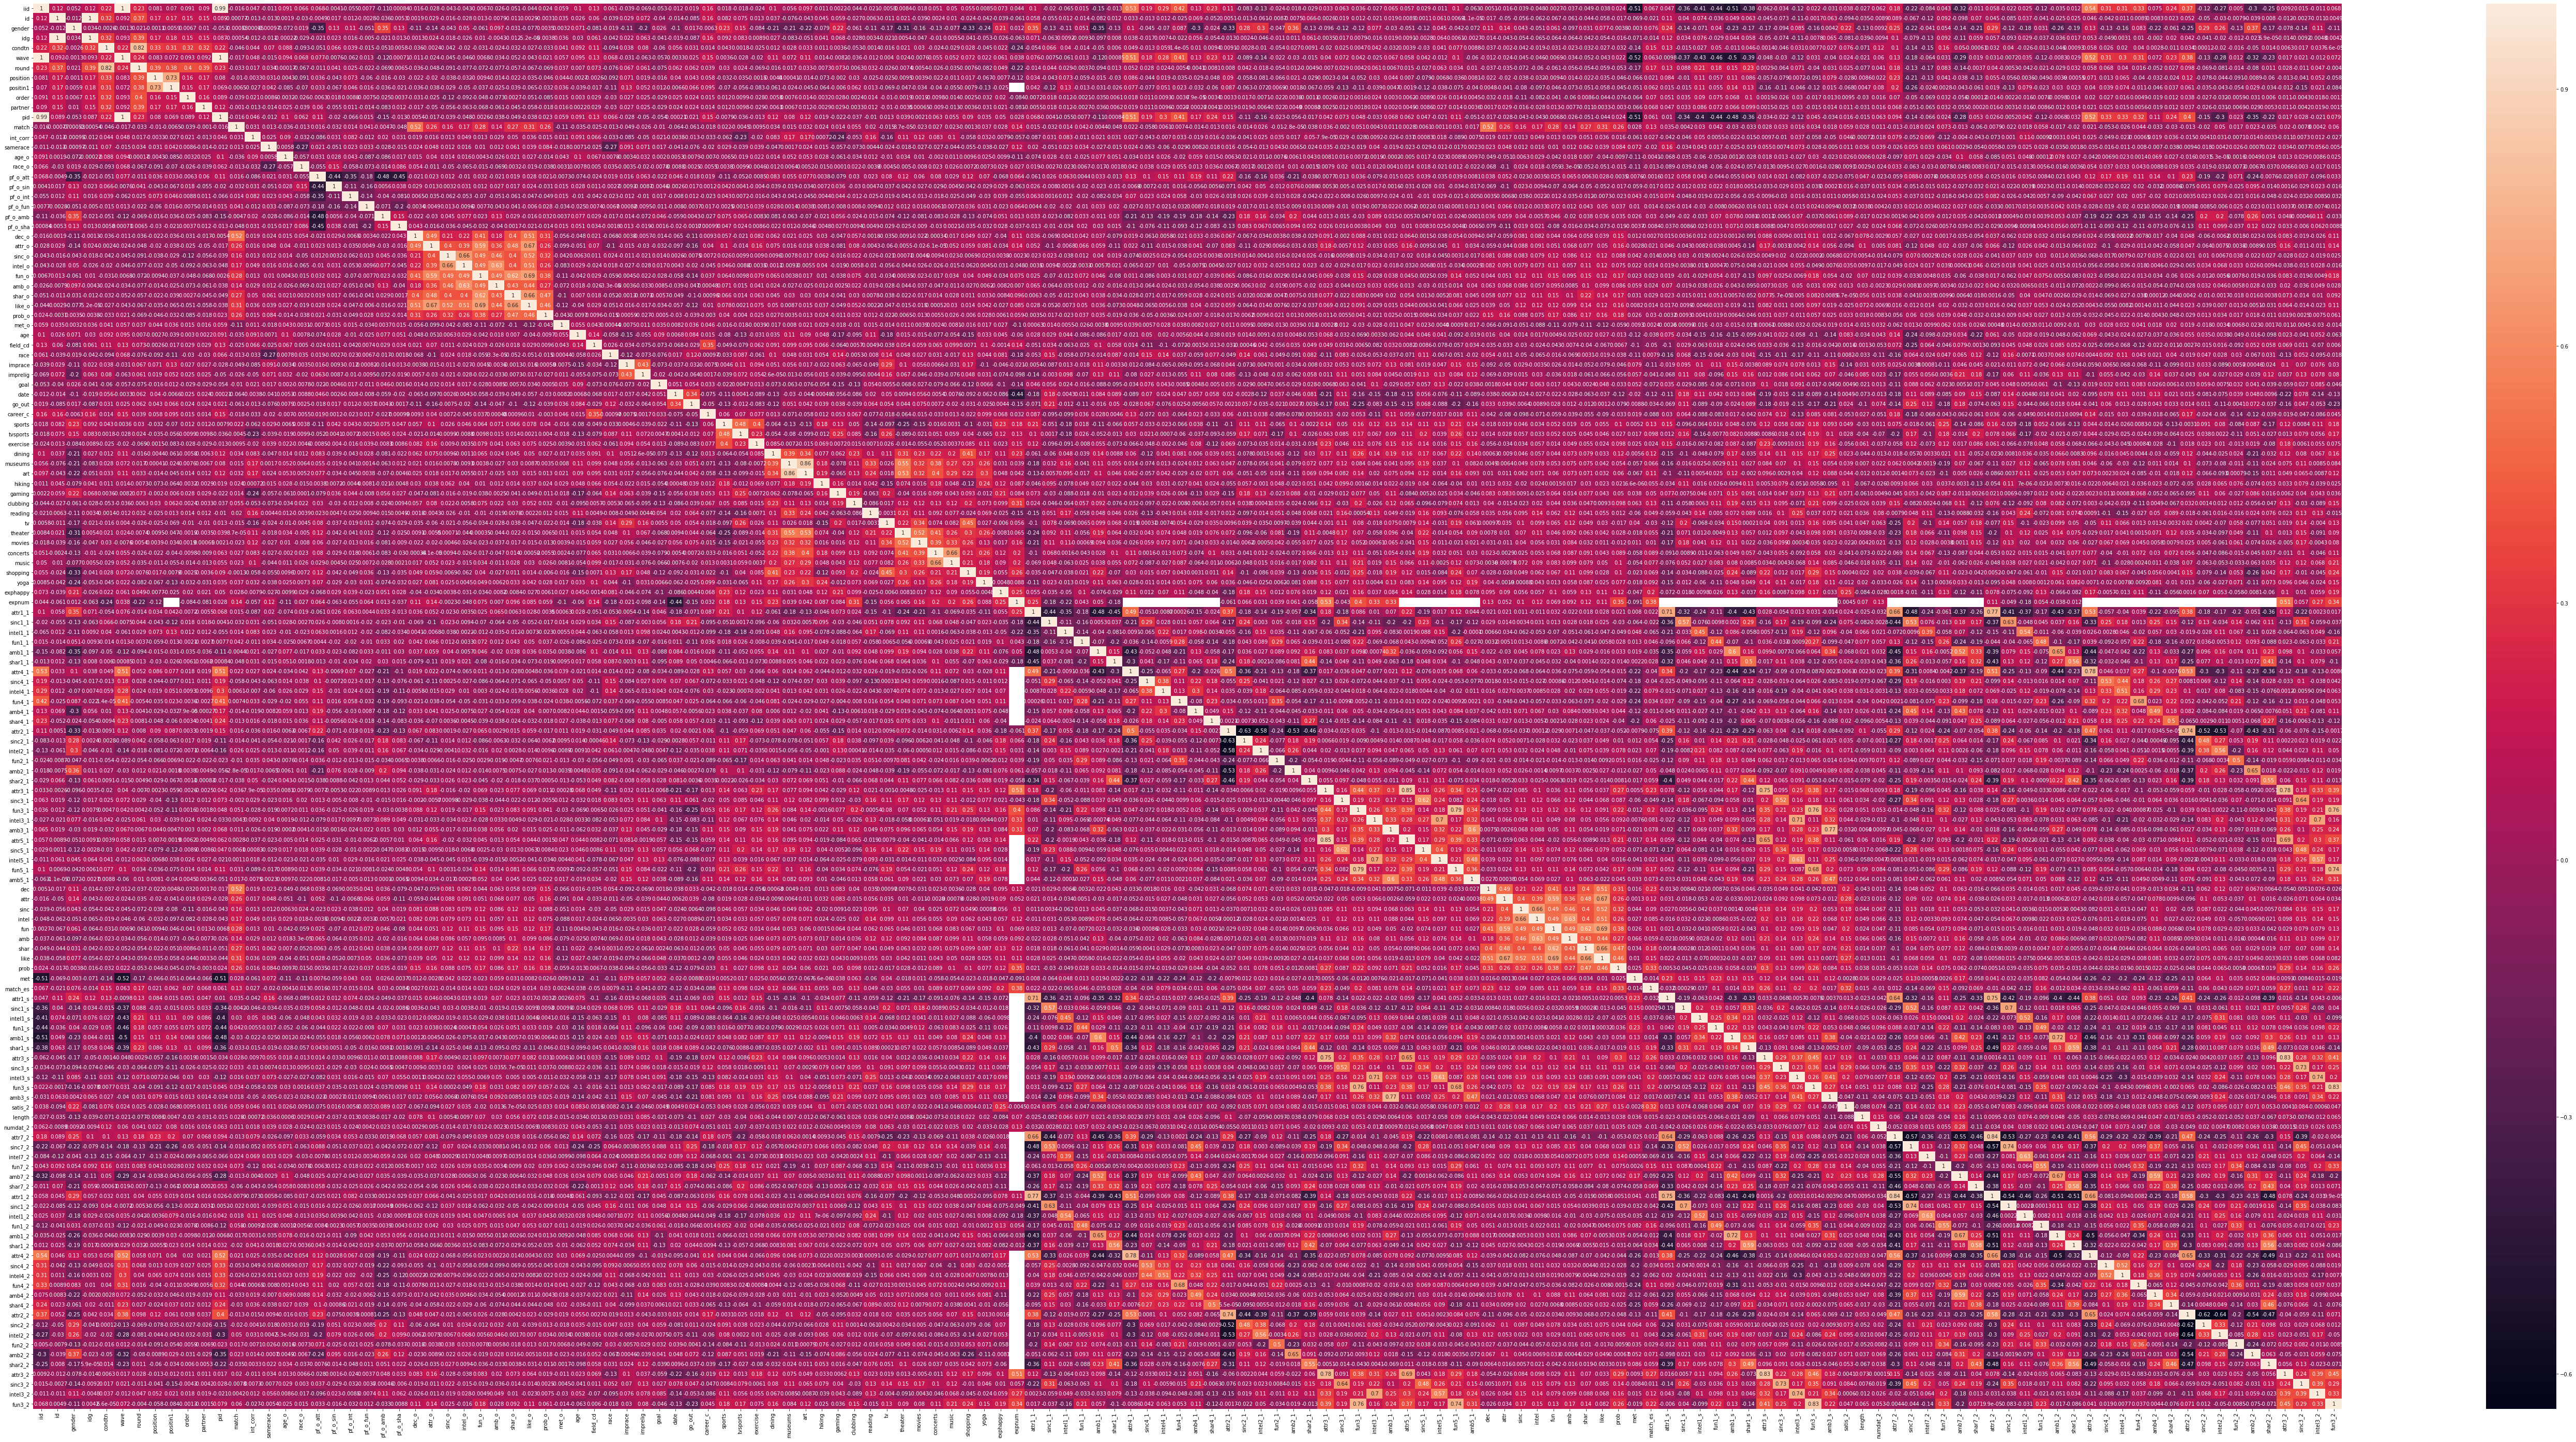

In [19]:
plt.subplots(figsize=(100, 50));
sns.heatmap(features.corr(), annot=True)

* En regardant notre matrice de corrélation, on peut constater que certaines variables sont plus corrélées avec la variable "match" que d'autres. La variable "match" est considérée ici comme notre variable cible. Nous avons décidé de choisir parmis les variables plus corrélées avec la variable "match", les variables suivantes : 

* Choix des variables

In [100]:
data = dataset_full.loc[: , ("gender", "wave", "match", "dec", "attr", "sinc", "intel", "fun", "amb", "shar", "dec_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", 'attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1')]
data.head()

gender  wave  match  dec  attr  sinc  intel  fun  amb  shar  ...  intel_o  \
0       0     1      0    1   6.0   9.0    7.0  7.0  6.0   5.0  ...      8.0   
1       0     1      0    1   7.0   8.0    7.0  8.0  5.0   6.0  ...     10.0   
2       0     1      1    1   5.0   8.0    9.0  8.0  5.0   7.0  ...     10.0   
3       0     1      1    1   7.0   6.0    8.0  7.0  6.0   8.0  ...      9.0   
4       0     1      1    1   5.0   6.0    7.0  7.0  6.0   6.0  ...      9.0   

   fun_o  amb_o  shar_o  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  
0    8.0    8.0     6.0     15.0     20.0      20.0    15.0    15.0     15.0  
1    7.0    7.0     5.0     15.0     20.0      20.0    15.0    15.0     15.0  
2   10.0   10.0    10.0     15.0     20.0      20.0    15.0    15.0     15.0  
3    8.0    9.0     8.0     15.0     20.0      20.0    15.0    15.0     15.0  
4    6.0    9.0     7.0     15.0     20.0      20.0    15.0    15.0     15.0  

[5 rows x 23 columns]

* Dans toute la suite, nous allons travailler uniquement avec les features qu'on a choisi ci-dessus. Ainsi notre nouveaux jeu de données contient 23 variables.



* Affichons maintenant la matrice de corrélation et regardons la corrélation de nos features avec la variable cible.

In [72]:
features_data = data.iloc[:, :]
corr = features_data.corr()
corr

gender      wave     match       dec      attr      sinc  \
gender    1.000000 -0.001264 -0.000530  0.110232  0.138645  0.043357   
wave     -0.001264  1.000000 -0.017404 -0.011598 -0.024282 -0.044522   
match    -0.000530 -0.017404  1.000000  0.521943  0.260676  0.164449   
dec       0.110232 -0.011598  0.521943  1.000000  0.486775  0.209994   
attr      0.138645 -0.024282  0.260676  0.486775  1.000000  0.399897   
sinc      0.043357 -0.044522  0.164449  0.209994  0.399897  1.000000   
intel    -0.050754 -0.045748  0.169532  0.217313  0.391064  0.657664   
fun       0.061249 -0.006949  0.277545  0.414477  0.586382  0.491693   
amb      -0.097410 -0.033900  0.140042  0.183659  0.359438  0.456529   
shar      0.030922 -0.052271  0.270679  0.400644  0.480312  0.398425   
dec_o    -0.111550 -0.010831  0.522326 -0.047038 -0.059181  0.081418   
attr_o   -0.138956 -0.024484  0.260837 -0.059360 -0.043858  0.087868   
sinc_o   -0.043458 -0.044629  0.164523  0.081447  0.087877  0.082911   
intel_o   0.050361 -0.046284  0.169448  0.081869  0.091390  0.079115   
fun_o    -0.061314 -0.006829  0.277700  0.044162  0.050925  0.120728   
amb_o     0.097043 -0.034464  0.139927  0.063330  0.068123  0.086291   
shar_o   -0.031105 -0.052496  0.270840  0.057808  0.077086  0.120740   
attr1_1   0.352203  0.075643  0.014950 -0.021145  0.021283  0.010995   
sinc1_1  -0.128191 -0.007532 -0.032325  0.028665  0.014014  0.003450   
intel1_1 -0.108005 -0.061277  0.014087 -0.006600 -0.034411 -0.062281   
fun1_1    0.050666  0.013249  0.041652 -0.003156  0.005100  0.013129   
amb1_1   -0.348955 -0.121638 -0.004444 -0.021869 -0.030382  0.044993   
shar1_1  -0.134207  0.000847 -0.048318  0.042715 -0.016537 -0.036514   

             intel       fun       amb      shar  ...   intel_o     fun_o  \
gender   -0.050754  0.061249 -0.097410  0.030922  ...  0.050361 -0.061314   
wave     -0.045748 -0.006949 -0.033900 -0.052271  ... -0.046284 -0.006829   
match     0.169532  0.277545  0.140042  0.270679  ...  0.169448  0.277700   
dec       0.217313  0.414477  0.183659  0.400644  ...  0.081869  0.044162   
attr      0.391064  0.586382  0.359438  0.480312  ...  0.091390  0.050925   
sinc      0.657664  0.491693  0.456529  0.398425  ...  0.079115  0.120728   
intel     1.000000  0.494370  0.627483  0.400285  ...  0.073475  0.112297   
fun       0.494370  1.000000  0.489806  0.617989  ...  0.112202  0.151953   
amb       0.627483  0.489806  1.000000  0.432839  ...  0.057112  0.094711   
shar      0.400285  0.617989  0.432839  1.000000  ...  0.111517  0.148731   
dec_o     0.082175  0.043994  0.063687  0.057866  ...  0.216704  0.414276   
attr_o    0.091355  0.050780  0.068104  0.077086  ...  0.390744  0.586334   
sinc_o    0.079115  0.120639  0.086291  0.120740  ...  0.657548  0.491453   
intel_o   0.073475  0.112202  0.057112  0.111517  ...  1.000000  0.494097   
fun_o     0.112297  0.151953  0.094711  0.148731  ...  0.494097  1.000000   
amb_o     0.057112  0.094601  0.008519  0.101098  ...  0.627332  0.489570   
shar_o    0.111517  0.148602  0.101098  0.222730  ...  0.400031  0.617995   
attr1_1  -0.010976  0.031709 -0.022277  0.018387  ... -0.003456  0.025474   
sinc1_1   0.031186  0.012799  0.027847  0.017689  ... -0.009441 -0.070435   
intel1_1 -0.053035 -0.070467 -0.050713 -0.060682  ... -0.002160 -0.012126   
fun1_1   -0.008860 -0.007243 -0.042321 -0.040631  ... -0.003304  0.071868   
amb1_1    0.077640  0.022718  0.131315  0.028547  ... -0.005650  0.045889   
shar1_1  -0.044738 -0.032135 -0.040498  0.001444  ...  0.021427 -0.080013   

             amb_o    shar_o   attr1_1   sinc1_1  intel1_1    fun1_1  \
gender    0.097043 -0.031105  0.352203 -0.128191 -0.108005  0.050666   
wave     -0.034464 -0.052496  0.075643 -0.007532 -0.061277  0.013249   
match     0.139927  0.270840  0.014950 -0.032325  0.014087  0.041652   
dec       0.063330  0.057808 -0.021145  0.028665 -0.006600 -0.003156   
attr      0.068123  0.077086  0.021283  0.014014 -0.034411  0.005100   
si

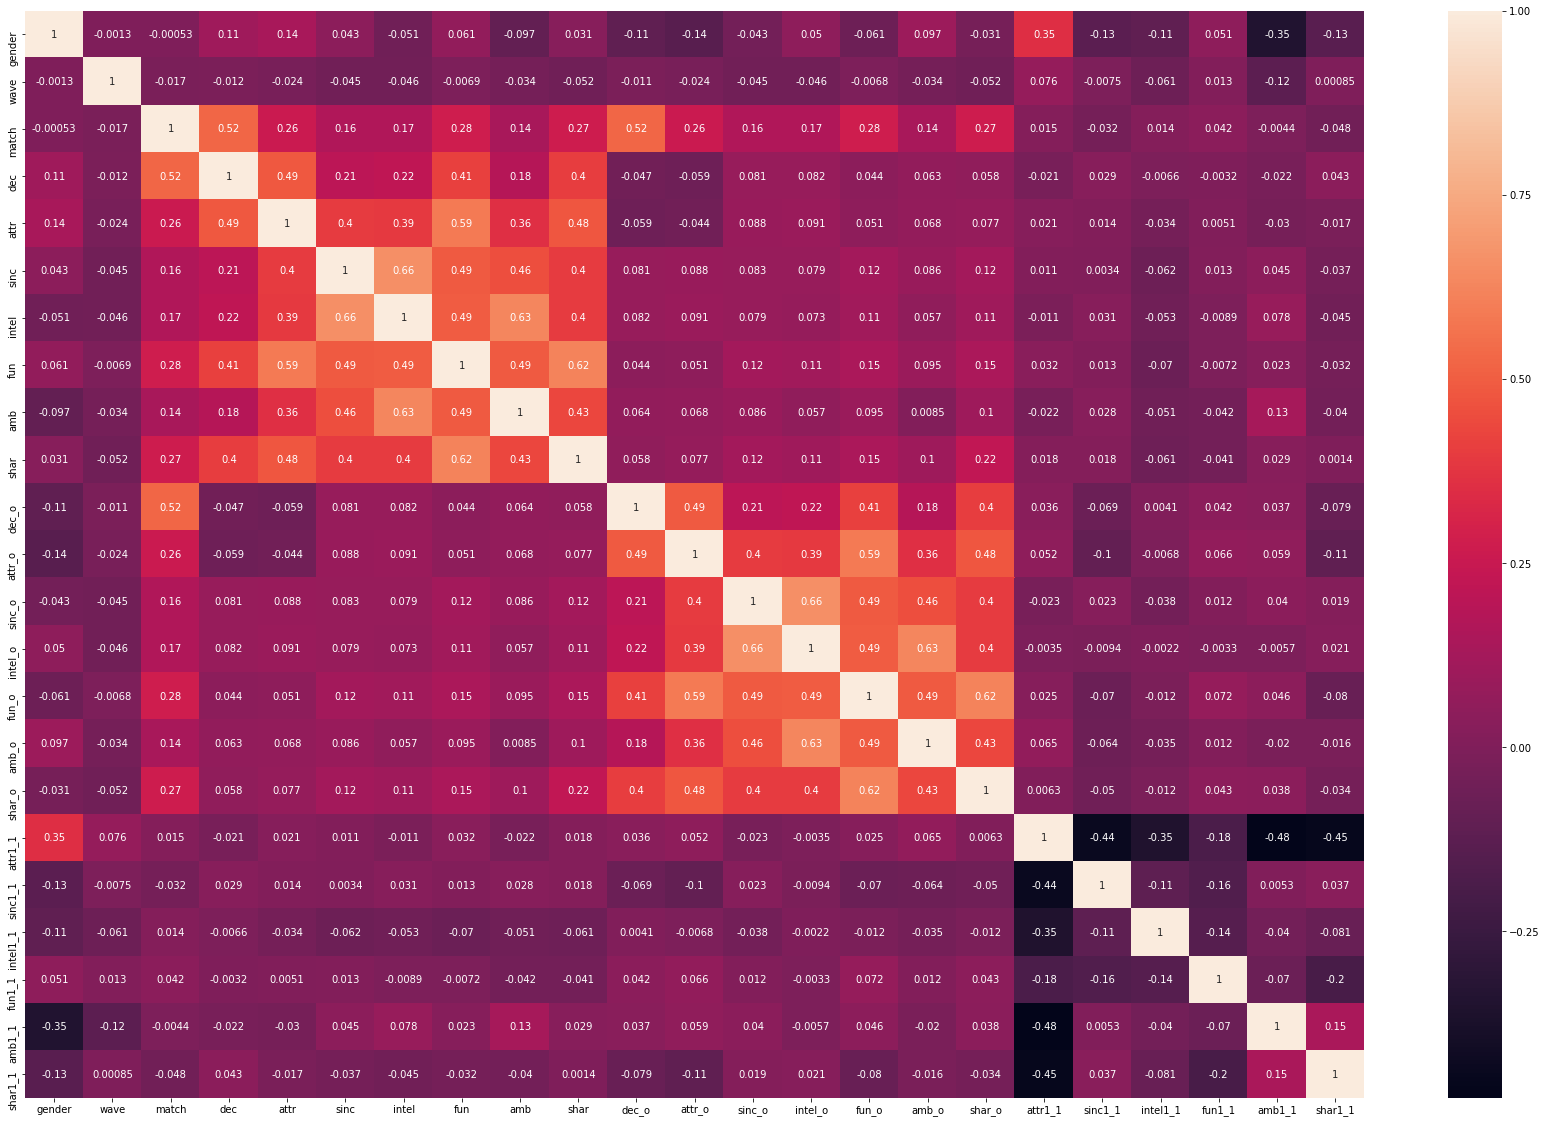

In [73]:
plt.subplots(figsize=(30, 20));
sns.heatmap(features_data.corr(), annot=True)

* Avant de commencer notre analyse, nous allons résoudre le problème des valeurs manquantes, en faisant un imputation par la moyenne.

In [74]:
dataset = data.fillna(data.mean())
dataset.head()

gender  wave  match  dec  attr  sinc  intel  fun  amb  shar  ...  intel_o  \
0       0     1      0    1   6.0   9.0    7.0  7.0  6.0   5.0  ...      8.0   
1       0     1      0    1   7.0   8.0    7.0  8.0  5.0   6.0  ...     10.0   
2       0     1      1    1   5.0   8.0    9.0  8.0  5.0   7.0  ...     10.0   
3       0     1      1    1   7.0   6.0    8.0  7.0  6.0   8.0  ...      9.0   
4       0     1      1    1   5.0   6.0    7.0  7.0  6.0   6.0  ...      9.0   

   fun_o  amb_o  shar_o  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  
0    8.0    8.0     6.0     15.0     20.0      20.0    15.0    15.0     15.0  
1    7.0    7.0     5.0     15.0     20.0      20.0    15.0    15.0     15.0  
2   10.0   10.0    10.0     15.0     20.0      20.0    15.0    15.0     15.0  
3    8.0    9.0     8.0     15.0     20.0      20.0    15.0    15.0     15.0  
4    6.0    9.0     7.0     15.0     20.0      20.0    15.0    15.0     15.0  

[5 rows x 23 columns]

In [75]:
dataset.isnull().any()

gender      False
wave        False
match       False
dec         False
attr        False
sinc        False
intel       False
fun         False
amb         False
shar        False
dec_o       False
attr_o      False
sinc_o      False
intel_o     False
fun_o       False
amb_o       False
shar_o      False
attr1_1     False
sinc1_1     False
intel1_1    False
fun1_1      False
amb1_1      False
shar1_1     False
dtype: bool

* En fin nos données sont prêtes à être exploiter, nous allons commencer notre analyse.


* Regardons le taux de match moyenne par wave et la taux de retour positif par wave.

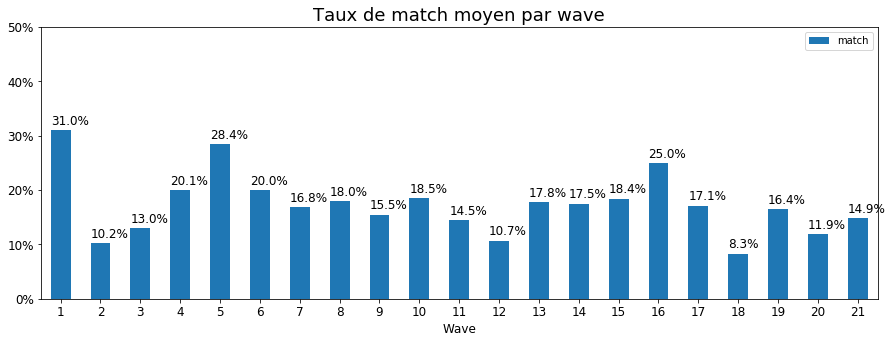

In [76]:
 ax = dataset[['wave', 'match']].groupby('wave').mean().plot(kind='bar', legend=True, figsize=(15,5),
                                                        ylim=(0,0.5))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Taux de match moyen par wave', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

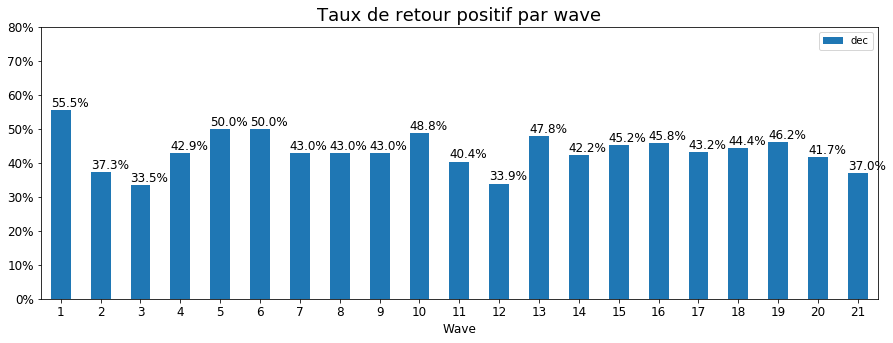

In [77]:
ax = dataset[['wave', 'dec']].groupby('wave').mean().plot(kind='bar', legend=True, figsize=(15,5),
                                                        ylim=(0,0.8))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Taux de retour positif par wave', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

* Nous voyons que demander aux gens d’être plus sélectifs lors de la wave 12 a entraîné une baisse du nombre de correspondances et des retours positifs, mais rien de ça n’est arrivé dans les autres vagues.



* Nous pouvons également voir quelque chose se passer dans les waves où les gens ont été invités à apporter un livre ou un magazine, mais il serait prématuré et probablement très erroné de tirer des conclusions.


* La question qu'on peut se poser à présent est comment les participants évaluent leurs partenaires ?

In [117]:
atributes_dec = dataset[['match', 'attr', 'sinc','intel','fun','amb','shar']]
cols = ['match', 'Attractive','Sincere','Intelligente','Fun','Ambituous','Shared_Interests']
atributes_dec.columns = cols

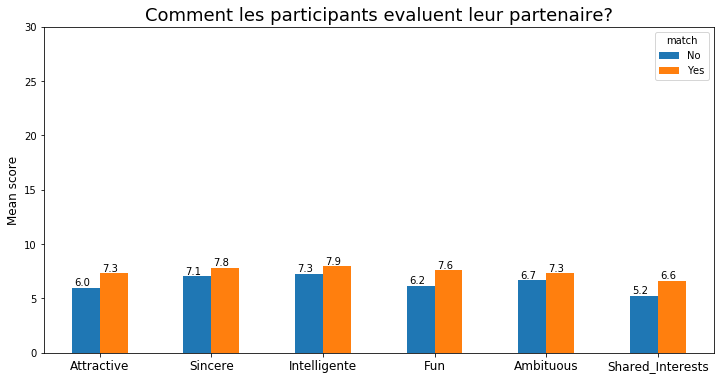

In [118]:
tmp = atributes_dec.groupby('match').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'No', 1: 'Yes'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,30))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Comment les participants evaluent leur partenaire?', fontsize=18)
ax.set_ylabel('Mean score', fontsize=12)

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+0.2, \
            str(round((i.get_height()), 1)), fontsize=10)

Text(0.5, 0.98, 'Comment évaluez-vous votre partenaire?')

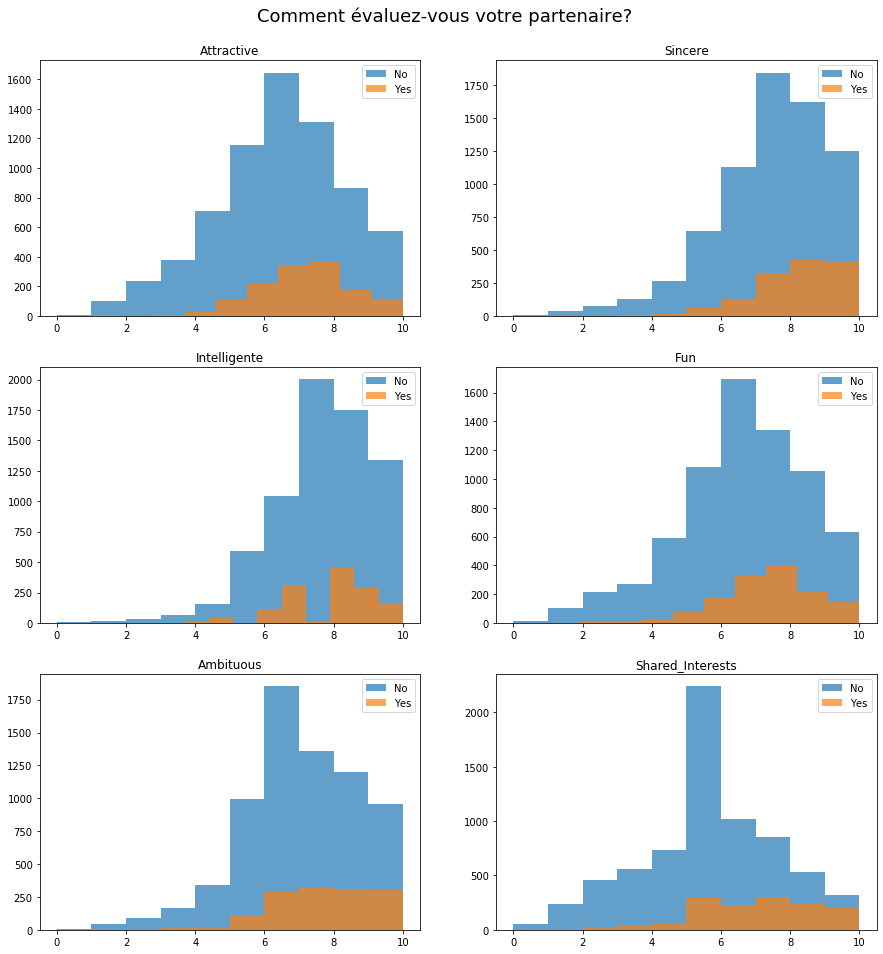

In [119]:
features = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared_Interests']

num = len(features)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in features:
    atributes_dec[atributes_dec.match==0][feat].hist(label='No', ax=ax[i][j], bins=10, alpha=0.7)
    atributes_dec[atributes_dec.match==1][feat].hist(label='Yes', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('Comment évaluez-vous votre partenaire?', fontsize=18)

* En regardant ces différents graphes, on constate que des taux plus élevés mènent à des décisions positives, avec des écarts plus importants, voir l'attribut Attractive.


* Nous remarquons également, toutefois, que des commentaires positifs peuvent arriver même si le score est très faible.


* Cherchons à comprendre ce que recherchent les participants chez leurs partenaires avant rencontre 

In [131]:
atributes_gender = dataset[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
cols = ['gender', 'Attractive','Sincere','Intelligente','Fun','Ambituous','Shared_Interests']
atributes_gender.columns = cols

In [132]:
atributes_gender.groupby('gender').mean()

Attractive    Sincere  Intelligente        Fun  Ambituous  \
gender                                                              
0        18.118108  18.292196     20.992111  17.151660  12.796979   
1        26.900673  16.502718     19.540847  17.761698   8.573141   

        Shared_Interests  
gender                    
0              12.687563  
1              11.004667

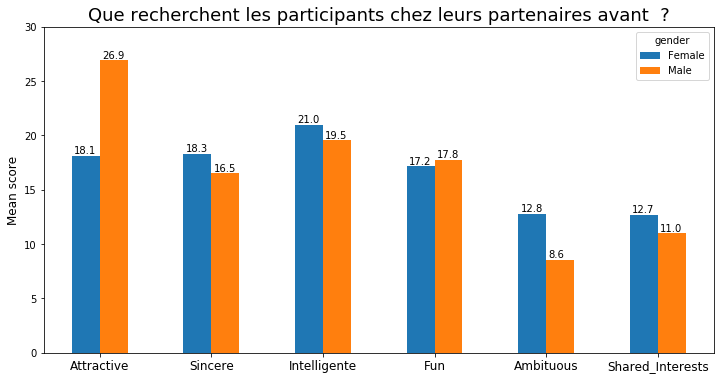

In [133]:
tmp = atributes_gender.groupby('gender').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'Female', 1: 'Male'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,30))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Que recherchent les participants chez leurs partenaires avant  ?', fontsize=18)
ax.set_ylabel('Mean score', fontsize=12)

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+0.2, \
            str(round((i.get_height()), 1)), fontsize=10)

* Regardons aussi ce que recherchent les participants chez leurs partenaires pendant leur rencontre

In [134]:
data_1 = dataset_full.loc[: , ("gender", "wave", "match", "dec",'attr1_2', 'sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2')]
dataset_1 = data_1.fillna(data_1.mean())
atributes_gender_1 = data_1[['gender','attr1_2', 'sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2']]
cols = ['gender', 'Attractive','Sincere','Intelligente','Fun','Ambituous','Shared_Interests']
atributes_gender_1.columns = cols

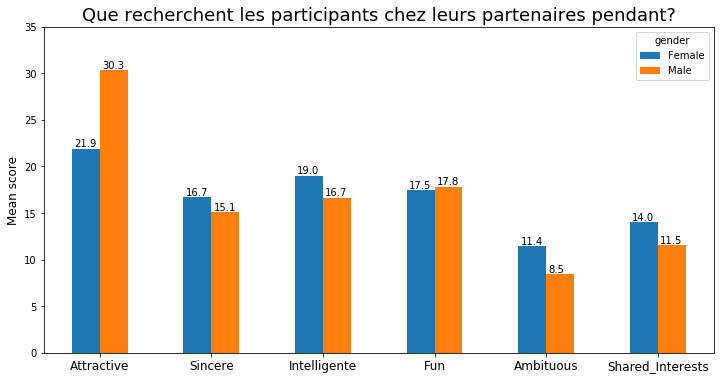

In [135]:
tmp = atributes_gender_1.groupby('gender').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'Female', 1: 'Male'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,35))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Que recherchent les participants chez leurs partenaires pendant?', fontsize=18)
ax.set_ylabel('Mean score', fontsize=12)

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+0.2, \
            str(round((i.get_height()), 1)), fontsize=10)

* Que recherchent les participants chez leurs partenaires après rencontre ?

In [136]:
data_2 = dataset_full.loc[: , ("gender", "wave", "match", "dec",'attr1_3', 'sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3')]
dataset_2 = data_2.fillna(data_2.mean())
atributes_gender_2 = data_2[['gender','attr1_3', 'sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3']]
cols = ['gender', 'Attractive','Sincere','Intelligente','Fun','Ambituous','Shared_Interests']
atributes_gender_2.columns = cols

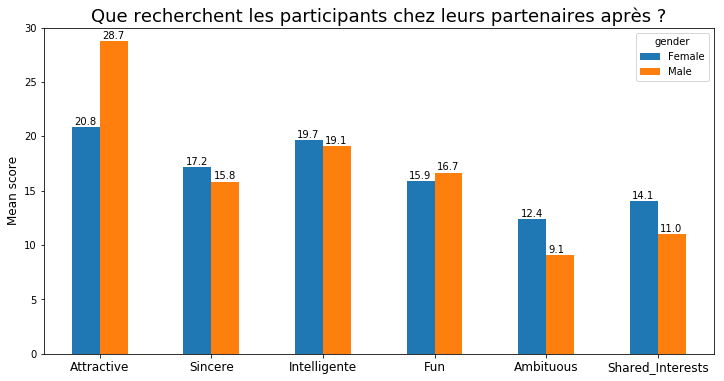

In [0]:
tmp = atributes_gender_2.groupby('gender').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'Female', 1: 'Male'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,30))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Que recherchent les participants chez leurs partenaires après ?', fontsize=18)
ax.set_ylabel('Mean score', fontsize=12)

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+0.2, \
            str(round((i.get_height()), 1)), fontsize=10)

* En regardant ces differentes graphes, on peut constater une grande différence entre ce que recherche les participants masculins et  et les participants féminins.


* Pour les participants masculins, l'attirance de la femme est plus important, l'ambition ou le fait qu'ils partages les mêmes intérêts importe peu.


* Pour les participants feminins, les points sont répartis plus uniformément sur tous les attributs, l’intelligence étant légèrement supérieure aux autres.
 

* On peut conclure que les hommes recherchent des femmes attirantes et se soucient moins de leur ambition et de leurs intérêts communs. D'autre part, les femmes recherchent un homme complet et valorisent l'intelligence chez un homme